<a href="https://colab.research.google.com/github/ele9996/NetworkDynamicsAndLearningLabs/blob/main/HMW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import random
np.random.seed(666)

In [23]:
#plottare anche i new infected per week
#vedere se riesco a far partire la simulazione da un po' prima (Facoltativo)


#Problem 1

##1.1

Plot the graph and variables definition

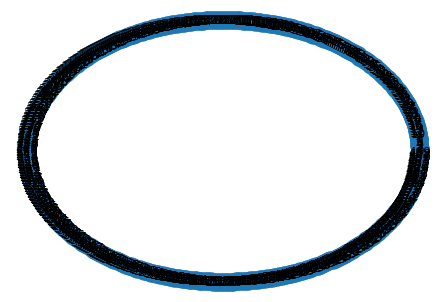

In [24]:

nodes=500
k=4


G = nx.Graph()
nx.add_cycle(G, range(nodes))
for n in range(nodes):
    other = n+3
    if other>=nodes:
        other-=nodes
    G.add_edge(other,n)

nx.draw_circular(G, with_labels=True)




In [25]:
#Array and variables definition

beta=0.3
ro=0.7
weeks=15
N=100


#array containing the total infected people each week for all simulations 
tot_inf = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

#array containing the total new infected people each week for all simulations 
tot_new_infected = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

#array containing the total recovered people each week for all simulations 
tot_recovered = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

#array containing the total subsceptible people each week for all simulations 
tot_subsceptible = np.array([[500.,500,500,500,500,500,500,500,500,500,500,500,500,500,500]])

In [26]:
#simulation of epidemics

def MySim(weeks, nodes,n_status,n_infected,n_subsceptible,n_recovered,n_new_infected): 
  
  n_status_next=np.copy(n_status)
  #print("initial_n_status_next=n_staus: {}".format(n_status_next))
  
  for i in range(weeks):
    #print("settimana {}".format(i))
    new_inf=0

    for node in range(nodes):
      #print("node:{}".format(node))
      m=0
      

      #find infected neighbors number(m)--> se non è già lui infetto
      for neigh in G.neighbors(node):
        if n_status[neigh]==1:
          m+=1
      #print("m={}".format(m))
      
      #with the following if chain I see if my node can change status
      random_prob=random.random()
      #print("random probability={}".format(random_prob))
      #print("known prob: {}".format((1-beta)**m))
      
      if n_status[node]==0:
        if random_prob > (1-beta)**m:
          n_status_next[node]=1  
          new_inf +=1
        #print("status_next={}".format(n_status_next))
        #print("status={}".format(n_status))
      
      if n_status[node]==1:
        if random_prob<ro:
          n_status_next[node]=2

    #print(n_status)
    #print(n_status_next)
    infected=np.count_nonzero(n_status_next==1)
    recovered=np.count_nonzero(n_status_next==2)
    subsceptible=np.count_nonzero(n_status_next==0)

    #print("old infected number in the week: {}".format(infected_old))
    #print("infected number in the week: {}".format(infected))
    n_infected[i]=infected
    n_recovered[i]=recovered
    n_subsceptible[i]=subsceptible
    n_new_infected[i]=new_inf
    
    n_status=np.copy(n_status_next)
  #print("fine")
  #print("final infected array for every week:{}".format(n_infected))
  return n_infected,n_recovered,n_subsceptible,n_new_infected




In [27]:
#main loop

for n in range(N):
  #print("inizio simulazione {}".format(n))
  #n status contains the status of each node
  #status are defined as {0:'S', 1:'I', 2:'R'}
  n_status=np.zeros(nodes)
  
  #array containing the number of infected people each week in one simulation of 100
  n_infected=np.zeros(weeks)

  #array containing the number of recoverd people each week in one simulation of 100
  n_recovered=np.zeros(weeks)

  #array containing the number of subsceptible people each week in one simulation of 100
  n_subsceptible=np.zeros(weeks)

  #array containing the number of new infected people each week in one simulation of 100
  n_new_infected=np.zeros(weeks)
  
  #I randomly search for 10 nodes which will start as infected
  random_index=random.sample(range(0,nodes-1),10)
  #print("the nodes I selected to be infected are: {}".format(random_index))

  for index in random_index:
    n_status[index]=1

  #I run the simulation
  n_infected,n_recovered,n_subsceptible,n_new_infected=MySim(weeks,nodes,n_status,n_infected,n_subsceptible,n_recovered,n_new_infected)
  
  #print(n_subsceptible)
  tot_inf=np.concatenate((tot_inf, [n_infected]), axis = 0)
  tot_recovered=np.concatenate((tot_recovered, [n_recovered]), axis = 0)
  tot_subsceptible=np.concatenate((tot_subsceptible, [n_subsceptible]), axis = 0)
  tot_new_infected=np.concatenate((tot_new_infected, [n_new_infected]), axis = 0)

#print("totale infettati per ogni settimana per simulazione:{}".format(tot_inf))

avg_inf=np.average(tot_inf,axis=0)
avg_recovered=np.average(tot_recovered,axis=0)
avg_subsceptible=np.average(tot_subsceptible,axis=0)
avg_new_infected=np.average(tot_new_infected,axis=0)

#print("Average number of infected people per week={}".format(avg_subsceptible))

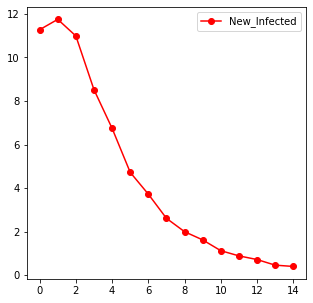

In [28]:
fig, ax = plt.subplots(figsize=(5,5))


ax.plot(avg_new_infected,'ro-', label="New_Infected")



ax.legend()
plt.show()

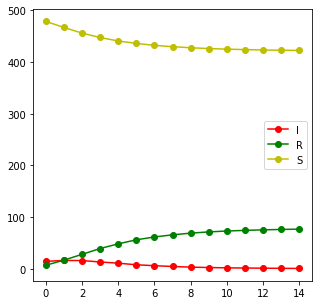

In [29]:
fig, ax = plt.subplots(figsize=(5,5))


ax.plot(avg_inf,'ro-', label="I",)
ax.plot(avg_recovered,'go-', label="R")
ax.plot(avg_subsceptible,'yo-', label="S")

ax.legend()
plt.show()



##1.2

In [30]:
def my_rand_graph(k,nodes_number):

  c=np.zeros(nodes_number,dtype=int)
  GPA = nx.complete_graph(k + 1)
  sum_degr=0


  for node in range(nodes_number):
    c[node]=k/2


  if k % 2 != 0:
    c[::2] += 1

  for i in range(k + 1, nodes_number):
    w = np.zeros(i, dtype=int)
    
    for n in GPA.nodes:
      w[n] = GPA.degree(n)

    neighbors = np.random.choice(GPA.nodes, size=c[i], replace=False, p=w/np.sum(w))
    
    for neig in neighbors:
      GPA.add_edge(i, neig)

  for no in range(nodes_number):
    sum_degr+=GPA.degree(no)
  
  avg_degree=sum_degr/len(GPA)
  
  return GPA, avg_degree



In [31]:
nodes_number=1000
k=2

G,avg_degree=my_rand_graph(k,nodes_number)


print("Graph Average degree: {}".format(avg_degree))  

Graph Average degree: 2.0


#Problem 2

In [32]:
nodes=500
k=6
beta=0.3
ro=0.7
weeks=15
N=100


G,avg_degree=my_rand_graph(k,nodes)

print("avg_degree:{}".format(avg_degree))



avg_degree:6.0


In [33]:

#array containing the total infected people each week for all simulations 
tot_inf = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

#array containing the total recovered people each week for all simulations 
tot_recovered = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

#array containing the total subsceptible people each week for all simulations 
tot_subsceptible = np.array([[500.,500,500,500,500,500,500,500,500,500,500,500,500,500,500]])

#array containing the total new infected people each week for all simulations 
tot_new_infected = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])



#main loop

for n in range(N):
  #print("inizio simulazione {}".format(n))
  #n status contains the status of each node
  #status are defined as {0:'S', 1:'I', 2:'R'}
  n_status=np.zeros(nodes)
  
  #array containing the number of infected people each week in one simulation of 100
  n_infected=np.zeros(weeks)

  #array containing the number of recoverd people each week in one simulation of 100
  n_recovered=np.zeros(weeks)

  #array containing the number of subsceptible people each week in one simulation of 100
  n_subsceptible=np.zeros(weeks)

  #array containing the number of new infected people each week in one simulation of 100
  n_new_infected=np.zeros(weeks)
  
  #I randomly search for 10 nodes which will start as infected
  random_index=random.sample(range(0,nodes-1),10)
  #print("the nodes I selected to be infected are: {}".format(random_index))

  for index in random_index:
    n_status[index]=1

  #I run the simulation
  n_infected,n_recovered,n_subsceptible,n_new_infected=MySim(weeks,nodes,n_status,n_infected,n_subsceptible,n_recovered,n_new_infected)
  
  #print(n_subsceptible)
  tot_inf=np.concatenate((tot_inf, [n_infected]), axis = 0)
  tot_recovered=np.concatenate((tot_recovered, [n_recovered]), axis = 0)
  tot_subsceptible=np.concatenate((tot_subsceptible, [n_subsceptible]), axis = 0)
  tot_new_infected=np.concatenate((tot_new_infected, [n_new_infected]), axis = 0)
   

#print("totale infettati per ogni settimana per simulazione:{}".format(tot_inf))

avg_inf=np.average(tot_inf,axis=0)
avg_recovered=np.average(tot_recovered,axis=0)
avg_subsceptible=np.average(tot_subsceptible,axis=0)
avg_new_infected=np.average(tot_new_infected,axis=0)

print("Average number of infected people per week={}".format(avg_subsceptible))

Average number of infected people per week=[474.56435644 424.5049505  327.63366337 222.36633663 153.67326733
 120.         105.21782178  99.45544554  97.10891089  96.12871287
  95.77227723  95.62376238  95.54455446  95.53465347  95.53465347]


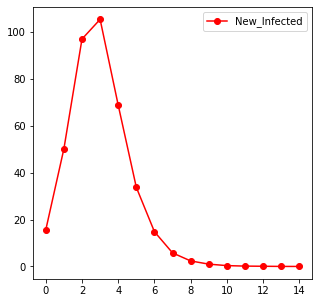

In [34]:
fig, ax = plt.subplots(figsize=(5,5))


ax.plot(avg_new_infected,'ro-', label="New_Infected")



ax.legend()
plt.show()

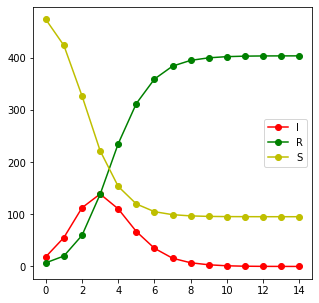

In [35]:
fig, ax = plt.subplots(figsize=(5,5))


ax.plot(avg_inf,'ro-', label="I",)
ax.plot(avg_recovered,'go-', label="R")
ax.plot(avg_subsceptible,'yo-', label="S")


ax.legend()
plt.show()

#Exercise 3

In [36]:
vacc=[0,5,15,25,35,45,55,60,60,60,60,60,60,60,60]


In [37]:
#simulation of epidemics
#status are defined as {0:'S', 1:'I', 2:'R',3:'V'}

def MySimVaccine(weeks, nodes,n_status,n_infected,n_subsceptible,n_recovered,n_vaccinated,n_new_infected,n_new_vaccinated): 

  n_status_next=np.copy(n_status)
  #n_status_next=n_status
  #print("initial_n_status_next=n_staus: {}".format(n_status_next))
  
  for i in range(weeks):
    new_inf=0
    new_vax=0
    #print("settimana {}".format(i))
    #understand how many people vaccine
    perc=vacc[i]-vacc[i-1]

    tot_people=(perc*(nodes))/100
    #print("tot people:{}".format(tot_people))
    
    if i==0:
      tot_people=0
    sequence=np.append(np.where(n_status==0),np.where(n_status==1))
    sequence=np.append(sequence,np.where(n_status==2))
    #print("seq:{}".format(sequence))
    new_rand_indexes=np.random.choice(sequence, int(tot_people),replace=False)

    for index in new_rand_indexes:
      n_status[index]=3
      new_vax+=1

    
    
    n_status_next=np.copy(n_status)
    #n_status_next=n_status
    #print(n_status_next)

    for node in range(nodes):
      #print("node:{}".format(node))
      m=0
      

      #find infected neighbors number(m)--> se non è già lui infetto
      for neigh in G.neighbors(node):
        if n_status[neigh]==1:
          m+=1
      #print("m={}".format(m))
      
      #with the following if chain I see if my node can change status
      random_prob=random.random()
      #print("random probability={}".format(random_prob))
      #print("known prob: {}".format((1-beta)**m))
      
      if n_status[node]==0:
        if random_prob > (1-beta)**m:
          n_status_next[node]=1  
          new_inf+=1
        #print("status_next={}".format(n_status_next))
        #print("status={}".format(n_status))
      
      if n_status[node]==1:
        if random_prob<ro:
          n_status_next[node]=2


    

    infected=np.count_nonzero(n_status_next==1)
    recovered=np.count_nonzero(n_status_next==2)
    subsceptible=np.count_nonzero(n_status_next==0)
    vaccinated=np.count_nonzero(n_status_next==3)

    #print("infected number in the week: {}".format(infected))
    n_infected[i]=infected
    n_recovered[i]=recovered
    n_subsceptible[i]=subsceptible
    n_vaccinated[i]=vaccinated
    n_new_infected[i]=new_inf
    n_new_vaccinated[i]=new_vax
    #n_status=n_status_next
    n_status=np.copy(n_status_next)
  #print("fine")
  #print("final infected array for every week:{}".format(n_infected))
  return n_infected,n_recovered,n_subsceptible,n_vaccinated,n_new_infected,n_new_vaccinated

In [38]:

#array containing the total infected people each week for all simulations 
tot_inf = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

#array containing the total recovered people each week for all simulations 
tot_recovered = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

#array containing the total vaccinated people each week for all simulations 
tot_vaccinated = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

#array containing the total subsceptible people each week for all simulations 
tot_subsceptible = np.array([[490,490,490,490,490,490,490,490,490,490,490,490,490,490,490]])

#array containing the total new infected people each week for all simulations 
tot_new_infected = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

#array containing the total new infected people each week for all simulations 
tot_new_vaccinated = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

#main loop

for n in range(N):
  #print("inizio simulazione {}".format(n))
  #n status contains the status of each node
  #status are defined as {0:'S', 1:'I', 2:'R',3:'V'}
  n_status=np.zeros(nodes)
  
  #array containing the number of infected people each week in one simulation of 100
  n_infected=np.zeros(weeks)

  #array containing the number of recoverd people each week in one simulation of 100
  n_recovered=np.zeros(weeks)

  #array containing the number of subsceptible people each week in one simulation of 100
  n_subsceptible=np.zeros(weeks)

  #array containing the number of subsceptible people each week in one simulation of 100
  n_vaccinated=np.zeros(weeks)

  #array containing the number of new infected people each week in one simulation of 100
  n_new_infected=np.zeros(weeks)

  #array containing the number of new vaccinated people each week in one simulation of 100
  n_new_vaccinated=np.zeros(weeks)
  
  #I randomly search for 10 nodes which will start as infected
  random_index=random.sample(range(0,nodes-1),10)
  #print("the nodes I selected to be infected are: {}".format(random_index))

  for index in random_index:
    n_status[index]=1

  #I run the simulation
  n_infected,n_recovered,n_subsceptible,n_vaccinated,n_new_infected,n_new_vaccinated=MySimVaccine(weeks,nodes,n_status,n_infected,n_subsceptible,n_vaccinated,n_recovered,n_new_infected,n_new_vaccinated)
  
  #print(n_subsceptible)
  tot_inf=np.concatenate((tot_inf, [n_infected]), axis = 0)
  tot_recovered=np.concatenate((tot_recovered, [n_recovered]), axis = 0)
  tot_subsceptible=np.concatenate((tot_subsceptible, [n_subsceptible]), axis = 0)
  tot_vaccinated=np.concatenate((tot_vaccinated, [n_vaccinated]), axis = 0)
  tot_new_infected=np.concatenate((tot_new_infected, [n_new_infected]), axis = 0)
  tot_new_vaccinated=np.concatenate((tot_new_vaccinated, [n_new_vaccinated]), axis = 0) 

#print("totale infettati per ogni settimana per simulazione:{}".format(tot_inf))

avg_inf=np.average(tot_inf,axis=0)
avg_recovered=np.average(tot_recovered,axis=0)
avg_subsceptible=np.average(tot_subsceptible,axis=0)
avg_vaccinated=np.average(tot_vaccinated,axis=0)
avg_new_infected=np.average(tot_new_infected,axis=0)
avg_new_vaccinated=np.average(tot_new_vaccinated,axis=0)

print("Average number of vaccinated people per week={}".format(avg_vaccinated))

-60
5
10
10
10
10
10
5
0
0
0
0
0
0
0
-60
5
10
10
10
10
10
5
0
0
0
0
0
0
0
-60
5
10
10
10
10
10
5
0
0
0
0
0
0
0
-60
5
10
10
10
10
10
5
0
0
0
0
0
0
0
-60
5
10
10
10
10
10
5
0
0
0
0
0
0
0
-60
5
10
10
10
10
10
5
0
0
0
0
0
0
0
-60
5
10
10
10
10
10
5
0
0
0
0
0
0
0
-60
5
10
10
10
10
10
5
0
0
0
0
0
0
0
-60
5
10
10
10
10
10
5
0
0
0
0
0
0
0
-60
5
10
10
10
10
10
5
0
0
0
0
0
0
0
-60
5
10
10
10
10
10
5
0
0
0
0
0
0
0
-60
5
10
10
10
10
10
5
0
0
0
0
0
0
0
-60
5
10
10
10
10
10
5
0
0
0
0
0
0
0
-60
5
10
10
10
10
10
5
0
0
0
0
0
0
0
-60
5
10
10
10
10
10
5
0
0
0
0
0
0
0
-60
5
10
10
10
10
10
5
0
0
0
0
0
0
0
-60
5
10
10
10
10
10
5
0
0
0
0
0
0
0
-60
5
10
10
10
10
10
5
0
0
0
0
0
0
0
-60
5
10
10
10
10
10
5
0
0
0
0
0
0
0
-60
5
10
10
10
10
10
5
0
0
0
0
0
0
0
-60
5
10
10
10
10
10
5
0
0
0
0
0
0
0
-60
5
10
10
10
10
10
5
0
0
0
0
0
0
0
-60
5
10
10
10
10
10
5
0
0
0
0
0
0
0
-60
5
10
10
10
10
10
5
0
0
0
0
0
0
0
-60
5
10
10
10
10
10
5
0
0
0
0
0
0
0
-60
5
10
10
10
10
10
5
0
0
0
0
0
0
0
-60
5
10
10
10
10
10
5
0
0
0
0
0
0
0
-

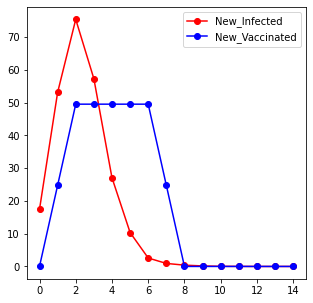

In [39]:
fig, ax = plt.subplots(figsize=(5,5))


ax.plot(avg_new_infected,'ro-', label="New_Infected")
ax.plot(avg_new_vaccinated,'bo-', label="New_Vaccinated")



ax.legend()
plt.show()

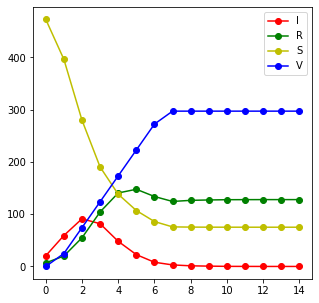

In [40]:
fig, ax = plt.subplots(figsize=(5,5))


ax.plot(avg_inf,'ro-', label="I",)
ax.plot(avg_recovered,'go-', label="R")
ax.plot(avg_subsceptible,'yo-', label="S")
ax.plot(avg_vaccinated,'bo-', label="V")


ax.legend()
plt.show()

#Problem 4

In [ ]:
vacc=[5,9,16,24,32,40,47,54,59,60,60,60,60,60,60,60]
I_0=[1,1,3,5,9,17,32,32,17,5,2,1,0,0,0,0]

weeks=16
k=10
beta=0.3
ro=0.6
delta_k=1
delta_beta=0.1
delta_ro=0.1
nodes=934
N=10
best_rmse=100000
mynewinf = np.zeros(weeks)

In [ ]:
def my_rand_graph(k,nodes_number):

  c=np.zeros(nodes_number,dtype=int)
  GPA = nx.complete_graph(k + 1)
  sum_degr=0


  for node in range(nodes_number):
    c[node]=k/2


  if k % 2 != 0:
    c[::2] += 1

  for i in range(k + 1, nodes_number):
    w = np.zeros(i, dtype=int)
    
    for n in GPA.nodes:
      w[n] = GPA.degree(n)

    neighbors = np.random.choice(GPA.nodes, size=c[i], replace=False, p=w/np.sum(w))
    
    for neig in neighbors:
      GPA.add_edge(i, neig)

  for no in range(nodes_number):
    sum_degr+=GPA.degree(no)
  
  avg_degree=sum_degr/len(GPA)
  
  return GPA, avg_degree


In [ ]:
def MySimVaccine(beta,ro,weeks, nodes,n_status,n_infected,n_subsceptible,n_recovered,n_vaccinated,n_new_infected,n_new_vaccinated,G): 

  n_status_next=np.copy(n_status)
  #n_status_next=n_status
  #print("initial_n_status_next=n_staus: {}".format(n_status_next))
  
  for i in range(weeks):
    new_inf=0
    new_vax=0
    #print("settimana {}".format(i))
    #understand how many people vaccine
    if i==0:
      perc=vacc[i]
    else:
      perc=vacc[i]-vacc[i-1]

    tot_people=(perc*(nodes))/100
    #print("tot people:{}".format(tot_people))

    sequence=np.append(np.where(n_status==0),np.where(n_status==1))
    sequence=np.append(sequence,np.where(n_status==2))
    #print("seq:{}".format(sequence))
    new_rand_indexes=np.random.choice(sequence, int(tot_people),replace=False)

    for index in new_rand_indexes:
      n_status[index]=3
      new_vax+=1

    
    
    n_status_next=np.copy(n_status)
    #n_status_next=n_status
    #print(n_status_next)

    for node in range(nodes):
      #print("node:{}".format(node))
      m=0
      

      #find infected neighbors number(m)--> se non è già lui infetto
      for neigh in G.neighbors(node):
        if n_status[neigh]==1:
          m+=1
      #print("m={}".format(m))
      
      #with the following if chain I see if my node can change status
      random_prob=random.random()
      #print("random probability={}".format(random_prob))
      #print("known prob: {}".format((1-beta)**m))
      
      if n_status[node]==0:
        #print("beta inside={}".format(beta))
        if random_prob > (1-beta)**m:
          n_status_next[node]=1  
          new_inf+=1
        #print("status_next={}".format(n_status_next))
        #print("status={}".format(n_status))
      
      if n_status[node]==1:
        #print("ro inside={}".format(beta))
        if random_prob<ro:
          n_status_next[node]=2


    

    infected=np.count_nonzero(n_status_next==1)
    recovered=np.count_nonzero(n_status_next==2)
    subsceptible=np.count_nonzero(n_status_next==0)
    vaccinated=np.count_nonzero(n_status_next==3)

    #print("infected number in the week: {}".format(infected))
    n_infected[i]=infected
    n_recovered[i]=recovered
    n_subsceptible[i]=subsceptible
    n_vaccinated[i]=vaccinated
    n_new_infected[i]=new_inf
    n_new_vaccinated[i]=new_vax
    #n_status=n_status_next
    n_status=np.copy(n_status_next)
  #print("fine")
  #print("final infected array for every week:{}".format(n_infected))
  return n_infected,n_recovered,n_subsceptible,n_vaccinated,n_new_infected,n_new_vaccinated

In [ ]:
def find_best(best_rmse,k,beta,ro, delta_beta, delta_k, delta_ro,mynewinf):
  #quuii
  new_inf_avg=np.copy(mynewinf)
  #new_inf_avg = mynewinf
  k_list=[k-delta_k,k,k+delta_k]
  beta_list=[beta-delta_beta,beta,beta+delta_beta]
  ro_list=[ro-delta_ro,ro,ro+delta_ro]

  for i in range(3):
    if k_list[i] < 2:
      k_list[i] = 2
    if beta_list[i] > 1.0:
      beta_list[i] = 1.0
    elif beta_list[i] < 0.0:
      beta_list[i] = 0.0
    if ro_list[i] > 1.0:
      ro_list[i] = 1.0
    elif ro_list[i] < 0.0:
        ro_list[i] = 0.0


  for kappa in k_list:
    for b in beta_list:
      for p in ro_list:
        G,avg_degree=my_rand_graph(k,nodes)
        
        #array containing the total infected people each week for all simulations 
        tot_inf = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

        #array containing the total recovered people each week for all simulations 
        tot_recovered = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

        #array containing the total vaccinated people each week for all simulations 
        tot_vaccinated = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

        #array containing the total subsceptible people each week for all simulations 
        tot_subsceptible = np.array([[490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490]])

        #array containing the total new infected people each week for all simulations 
        tot_new_infected = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

        #array containing the total new infected people each week for all simulations 
        tot_new_vaccinated = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])
        
        for n in range(N):
            #print("inizio simulazione {}".format(n))
            #n status contains the status of each node
            #status are defined as {0:'S', 1:'I', 2:'R',3:'V'}
            n_status=np.zeros(nodes)
            
            #array containing the number of infected people each week in one simulation of 100
            n_infected=np.zeros(weeks)

            #array containing the number of recoverd people each week in one simulation of 100
            n_recovered=np.zeros(weeks)

            #array containing the number of subsceptible people each week in one simulation of 100
            n_subsceptible=np.zeros(weeks)

            #array containing the number of subsceptible people each week in one simulation of 100
            n_vaccinated=np.zeros(weeks)

            #array containing the number of new infected people each week in one simulation of 100
            n_new_infected=np.zeros(weeks)

            #array containing the number of new vaccinated people each week in one simulation of 100
            n_new_vaccinated=np.zeros(weeks)
            
            #I randomly search for 10 nodes which will start as infected
            random_index=random.sample(range(0,nodes-1),10+ vacc[0])
            #print("the nodes I selected to be infected are: {}".format(random_index))

            for i_,index in enumerate(random_index):
              #n_status[index]=1
              if i_<10:
                n_status[index]=1
              else:
                n_status[index]=3

            #I run the simulation
            #S_nodes_avg, I_nodes_avg, R_nodes_avg, new_I_nodes_avg, vac_nodes, new_vac_nodes=model_epidemics_vax(G,beta,ro,infected_start,weeks,N,n_nodes,vacc=vacc)
            n_infected,n_recovered,n_subsceptible,n_vaccinated,n_new_infected,n_new_vaccinated=MySimVaccine(b,p,weeks,nodes,n_status,n_infected,n_subsceptible,n_vaccinated,n_recovered,n_new_infected,n_new_vaccinated,G)
            
            #print(n_subsceptible)
            my_n=np.concatenate(([1,1],n_new_infected[:-2]))
            #tot_new_infected=np.concatenate((tot_new_infected, [n_new_infected]), axis = 0)
            tot_new_infected=np.concatenate((tot_new_infected, [my_n]), axis = 0)

        #print("totale infettati per ogni settimana per simulazione:{}".format(tot_inf))
        avg_new_infected=np.average(tot_new_infected,axis=0)
        rmse=np.sqrt((1 / (weeks)) * np.sum((avg_new_infected - I_0)**2))
        print("rmse:{}".format(rmse))
        
        if rmse<best_rmse:
            ro=p
            beta=b
            k=kappa
            best_rmse=rmse
            new_inf_avg=np.copy(avg_new_infected)
            print("totale infettati per ogni settimana per simulazione:{}".format(new_inf_avg))
        print("")
  print("best rmse= {}".format(best_rmse))
  print(new_inf_avg)    
  return ro, beta,k,best_rmse,new_inf_avg     


In [ ]:

i=0
while True:
  print(i)
  best_ro,best_beta,best_k,rmse,new_inf_avg=find_best(best_rmse,k,beta,ro, delta_beta, delta_k, delta_ro,mynewinf)
  
  print("beta={}".format(beta))
  print("ro={}".format(ro))
  print("k={}".format(k))

  print("bbeta={}".format(best_beta))
  print("bro={}".format(best_ro))
  print("bk={}".format(best_k))

  if k==best_k and ro==best_ro and beta==best_beta:
    k=best_k
    ro=best_ro
    beta=best_beta
    best_rmse=rmse
    mynewinf=np.copy(new_inf_avg)
    break
  
  k=best_k
  ro=best_ro
  beta=best_beta
  best_rmse=rmse
  mynewinf=np.copy(new_inf_avg)

  i+=1
print("risultati")
print("beta={}".format(beta))
print("ro={}".format(ro))
print("k={}".format(k))

0
rmse:43.98481260241336
totale infettati per ogni settimana per simulazione:[  0.90909091   0.90909091  14.18181818  55.72727273 112.90909091
 135.63636364  89.36363636  41.27272727  18.           7.
   3.63636364   1.09090909   0.45454545   0.36363636   0.18181818
   0.        ]

rmse:37.41923810241584
totale infettati per ogni settimana per simulazione:[9.09090909e-01 9.09090909e-01 1.20000000e+01 4.76363636e+01
 1.03818182e+02 1.14545455e+02 7.64545455e+01 3.56363636e+01
 1.41818182e+01 6.00000000e+00 2.18181818e+00 6.36363636e-01
 3.63636364e-01 9.09090909e-02 1.81818182e-01 0.00000000e+00]

rmse:32.194511492612115
totale infettati per ogni settimana per simulazione:[9.09090909e-01 9.09090909e-01 1.56363636e+01 4.56363636e+01
 9.08181818e+01 9.73636364e+01 7.21818182e+01 3.35454545e+01
 1.53636364e+01 4.81818182e+00 2.00000000e+00 2.72727273e-01
 1.81818182e-01 9.09090909e-02 0.00000000e+00 0.00000000e+00]

rmse:65.27341177787451

rmse:60.723126049225115

rmse:56.16995222588187

r

In [ ]:
delta_k=[1, 1, 1, 1]
delta_ro=[0.1, 0.05, 0.025, 0.0125]
delta_beta=[0.1, 0.05, 0.025, 0.0125]

i=0
for i in range(3):
  print(i)
  db=delta_beta[i]
  dk=delta_k[i]
  dro=delta_ro[i]
  best_ro,best_beta,best_k,rmse,new_inf_avg=find_best(best_rmse,k,beta,ro, db, dk, dro,mynewinf)
  print(new_inf_avg)
  
  k=best_k
  ro=best_ro
  beta=best_beta
  best_rmse=rmse
  mynewinf=np.copy(new_inf_avg)
  i+=1


print("risultati")
print("beta={}".format(beta))
print("ro={}".format(ro))
print("k={}".format(k))
print("totale infettati per ogni settimana per simulazione:{}".format(mynewinf))



0
rmse:13.160111437896385

rmse:13.160111437896385

rmse:13.160111437896385

rmse:10.459015842644765

rmse:10.780611805880541

rmse:9.280967817871346

rmse:51.7847779095411

rmse:53.43652100258309

rmse:53.627310484044095

rmse:13.160111437896385

rmse:13.160111437896385

rmse:13.160111437896385

rmse:14.560379416771069

rmse:14.408732430298437

rmse:11.567333421291998

rmse:57.94146911302134

rmse:52.64787811724167

rmse:54.06020423396661

rmse:13.160111437896385

rmse:13.160111437896385

rmse:13.160111437896385

rmse:11.124413811281388

rmse:11.393574200304805

rmse:15.612974711400867

rmse:59.30943422090035

rmse:51.16103950087329

rmse:51.62752004935237

best rmse= 7.789389371244675
[ 0.90909091  0.90909091  9.18181818 19.90909091 25.72727273 30.90909091
 28.45454545 17.45454545 14.18181818  6.63636364  2.27272727  1.36363636
  1.09090909  0.72727273  0.54545455  0.18181818]
[ 0.90909091  0.90909091  9.18181818 19.90909091 25.72727273 30.90909091
 28.45454545 17.45454545 14.1818181

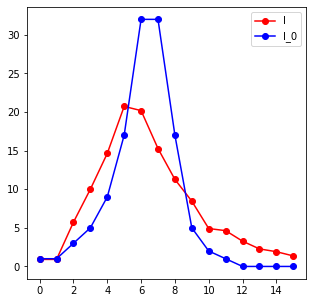

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))



ax.plot(mynewinf,'ro-', label="I")
ax.plot(I_0,'bo-', label="I_0")



ax.legend()
plt.show()